In [76]:
import pandas as pd
import numpy as np

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
df = pd.read_csv('train.csv')

In [79]:
df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
pet_id            18834 non-null object
issue_date        18834 non-null object
listing_date      18834 non-null object
condition         17357 non-null float64
color_type        18834 non-null object
length(m)         18834 non-null float64
height(cm)        18834 non-null float64
X1                18834 non-null int64
X2                18834 non-null int64
breed_category    18834 non-null float64
pet_category      18834 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [81]:
df.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [82]:
# too many null values in condition column

In [83]:
df.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


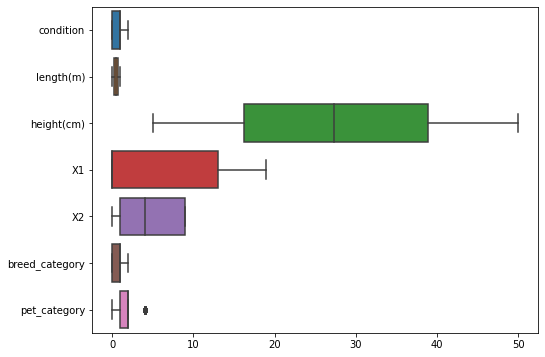

In [84]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, orient='h')

In [85]:
# not much outliers.

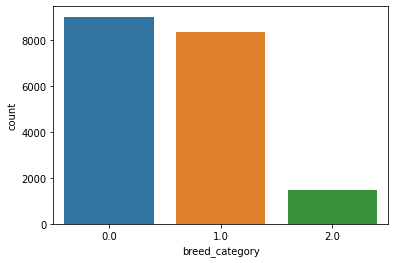

In [9]:
sns.countplot(df['breed_category'])

In [10]:
df['breed_category'].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

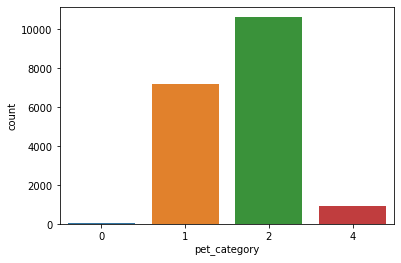

In [11]:
sns.countplot(df['pet_category'])

In [12]:
df['pet_category'].value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [13]:
# great class imbalance in target classes

In [14]:
df['color_type'].value_counts()

Black                4620
White                2453
Brown                1791
Brown Tabby          1687
Tan                  1349
Blue                  852
Orange Tabby          791
Red                   526
Brown Brindle         496
Tricolor              469
Blue Tabby            386
Tortie                366
Calico                343
Gray                  307
Chocolate             259
Torbie                242
Cream Tabby           191
Sable                 167
Cream                 162
Fawn                  159
Yellow                143
Buff                  125
Lynx Point            117
Blue Merle            104
Seal Point             78
Black Brindle          66
Gray Tabby             65
Black Tabby            55
Flame Point            52
Brown Merle            39
Orange                 39
Black Smoke            32
Gold                   31
Tortie Point           26
Silver                 24
Red Tick               23
Blue Tick              21
Blue Point             20
Lilac Point 

In [15]:
# too many color_type but some are rare so we will transform them.

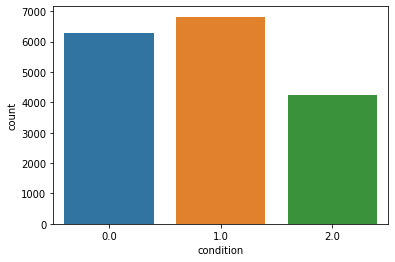

In [16]:
sns.countplot(df['condition'])

In [17]:
# most common condition==1

In [18]:
# let's explore correlation with several features.

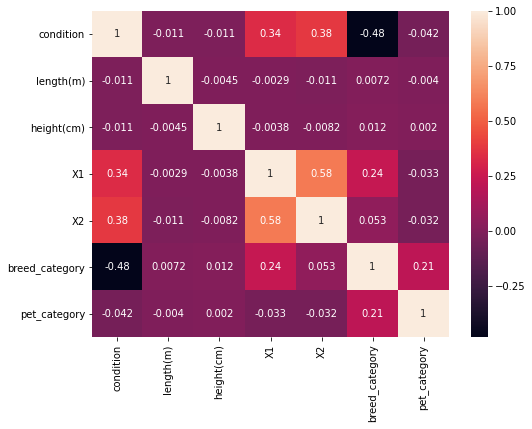

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

In [86]:
df1 = pd.concat([df['height(cm)'],df['length(m)'],df['pet_category']],axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetoo

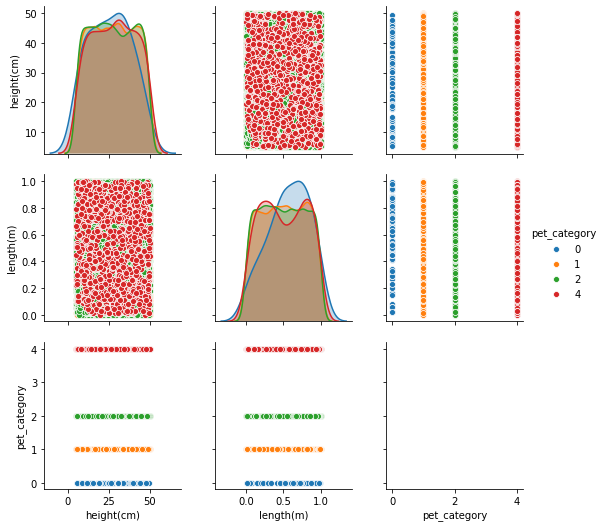

In [87]:
sns.pairplot(data=df1,hue='pet_category')

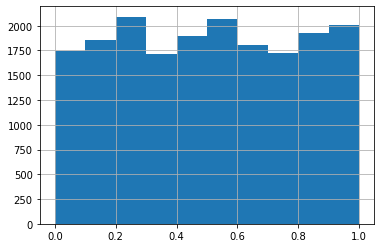

In [20]:
df['length(m)'].hist()

In [21]:
df['condition'].value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

In [22]:
# doesn't seem much informative
df.drop(['issue_date','listing_date'],axis=1,inplace=True)

In [23]:
# oh! length cann't be zero we'll impute them with mean length.
len(df[df['length(m)']==0])

93

In [24]:
len(df[df['height(cm)']==0])

0

In [25]:
mean_lt = np.mean(df['length(m)'].values)
def length_correction(x):
    if x==0:
        return mean_lt
    else:
        return x
df['length(m)'] = df['length(m)'].apply(length_correction)

In [26]:
len(df[df['length(m)']==0])

0

In [27]:
df.drop(['pet_id'],axis=1,inplace=True) 

In [28]:
df.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,1.0,White,0.72,14.19,13,9,0.0,2
2,NaN,Brown,0.15,40.90,15,4,2.0,4
3,1.0,White,0.62,17.82,0,1,0.0,2
4,2.0,Black,0.50,11.06,18,4,0.0,1


In [29]:
# through experimentation
df[df['breed_category']==2].isnull().sum()

condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [30]:
# so all nan values in condition is for breed_category==2
# so its wise to impute condition nan with a new class=3 for better prediction of breed_category.

In [31]:
df['condition'] = df['condition'].apply(lambda x: 3 if np.isnan(x)==True else x) 

In [32]:
common_colors=['Brown Tabby',
 'White',
 'Brown',
 'Black',
 'Red',
 'Tricolor',
 'Calico',
 'Brown Brindle',
 'Blue',
 'Tortie',
 'Gray',
 'Fawn',
 'Torbie',
 'Orange Tabby',
 'Sable',
 'Tan',
 'Blue Tabby',
 'Chocolate',
 'Cream Tabby',
 'Cream']

def transforming_colorType(dataset):
    for i in range(len(dataset)):
        if dataset['color_type'][i] not in common_colors:
            dataset['color_type'][i]='rare'
    colors=pd.get_dummies(dataset['color_type'])
    dataset=pd.concat([dataset,colors],axis=1)
    dataset.drop('color_type',axis=1,inplace=True)
    return dataset

In [33]:
df = transforming_colorType(df)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
df.head()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category,Black,Blue,Blue Tabby,...,Gray,Orange Tabby,Red,Sable,Tan,Torbie,Tortie,Tricolor,White,rare
0,2.0,0.80,7.78,13,9,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.72,14.19,13,9,0.0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.0,0.15,40.90,15,4,2.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.62,17.82,0,1,0.0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.0,0.50,11.06,18,4,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Breed Prediction

In [35]:
# to handle class imbalance in breed_category
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=42)
X_upSampled, y_upSampled = smk.fit_sample(df.drop(['breed_category','pet_category'],axis=1),df['breed_category'])

In [36]:
from collections import Counter

print('before oversampling {}'.format(Counter(df['breed_category'])))
print('after oversampling {}'.format(Counter(y_upSampled)))

before oversampling Counter({0.0: 9000, 1.0: 8357, 2.0: 1477})
after oversampling Counter({2.0: 8999, 1.0: 8353, 0.0: 8352})


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
rf = RandomForestClassifier()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_upSampled, y_upSampled, test_size=0.2, random_state=42)

In [40]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
rf.score(X_test,y_test)

0.9533164753938922

In [42]:
breed_predictions1 = rf.predict(X_test)
metrics.f1_score(y_test,breed_predictions1,average='weighted')

0.9533083011828768

In [43]:
from sklearn.model_selection import cross_val_score

scores1_list = cross_val_score(RandomForestClassifier(),X_upSampled,y_upSampled,cv=5,scoring='f1_weighted',verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.952, total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................................... , score=0.952, total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV] .................................... , score=0.947, total=   1.8s
[CV]  ................................................................
[CV] .................................... , score=0.952, total=   1.0s
[CV]  ................................................................
[CV] .................................... , score=0.949, total=   1.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.0s finished


In [44]:
scores1_list

array([0.95212807, 0.95234369, 0.94747042, 0.9519544 , 0.94900967])

In [45]:
np.mean(scores1_list)

0.950581249888406

### Pet Prediction

In [47]:
# to handle class imbalance in pet_category
smk1 = SMOTETomek(random_state=42)
X_upSampled_pet, y_upSampled_pet = smk1.fit_sample(df.drop(['pet_category'],axis=1),df['pet_category'])

In [48]:
print('before oversampling {}'.format(Counter(df['pet_category'])))
print('after oversampling {}'.format(Counter(y_upSampled_pet)))

before oversampling Counter({2: 10621, 1: 7184, 4: 941, 0: 88})
after oversampling Counter({0: 10607, 4: 10568, 1: 9838, 2: 9819})


In [49]:
X_train_pet,X_test_pet,Y_train_pet,Y_test_pet=train_test_split(X_upSampled_pet,y_upSampled_pet,test_size=0.2)
rf_pet=RandomForestClassifier()
rf_pet.fit(X_train_pet,Y_train_pet)
rf_pet.score(X_test_pet,Y_test_pet)

0.9297171544018612

In [50]:
pet_predictions1 = rf_pet.predict(X_test_pet)
metrics.f1_score(Y_test_pet,pet_predictions1,average='weighted')

0.9295402294890355

In [51]:
scores2_list = cross_val_score(RandomForestClassifier(),X_upSampled_pet,y_upSampled_pet,cv=5,scoring='f1_weighted',verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.918, total=   3.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] .................................... , score=0.937, total=   3.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


[CV] .................................... , score=0.932, total=   3.5s
[CV]  ................................................................
[CV] .................................... , score=0.936, total=   3.4s
[CV]  ................................................................
[CV] .................................... , score=0.934, total=   3.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.5s finished


In [52]:
scores2_list

array([0.91831839, 0.93671799, 0.93189637, 0.93644749, 0.93426901])

In [53]:
np.mean(scores2_list)

0.9315298493271886

### K Fold Cross Validation

In [54]:
from sklearn.model_selection import StratifiedKFold

In [55]:
kf1 = StratifiedKFold(n_splits=5)
breedModels = []
breedModelResults = []
for i in range(5):
    breedModels.append(RandomForestClassifier())

In [56]:
model_no = 0
for train_index,test_index in kf1.split(X_upSampled,y_upSampled):
    XTrain = X_upSampled.loc[train_index]
    yTrain = y_upSampled.loc[train_index]
    XTest = X_upSampled.loc[test_index]
    yTest = y_upSampled.loc[test_index]
    breedModels[model_no].fit(XTrain, yTrain)
    breedModelResults.append(metrics.f1_score(yTest,breedModels[model_no].predict(XTest),average='weighted'))
    model_no += 1

In [57]:
breedModelResults

[0.9531028190238058,
 0.9550670069910598,
 0.9499983030012322,
 0.9537042356269524,
 0.9515459915631759]

In [58]:
kf2 = StratifiedKFold(n_splits=5)
petModels = []
petModelResults = []
for i in range(5):
    petModels.append(RandomForestClassifier())

In [59]:
model_no = 0
for train_index, test_index in kf2.split(X_upSampled_pet,y_upSampled_pet):
    XTrain_pet = X_upSampled_pet.loc[train_index]
    yTrain_pet = y_upSampled_pet.loc[train_index]
    XTest_pet = X_upSampled_pet.loc[test_index]
    yTest_pet = y_upSampled_pet.loc[test_index]
    petModels[model_no].fit(XTrain_pet,yTrain_pet)
    petModelResults.append(metrics.f1_score(yTest_pet,petModels[model_no].predict(XTest_pet),average='weighted'))
    model_no += 1

In [60]:
petModelResults

[0.9192055057498781,
 0.93743932688642,
 0.9345838846185504,
 0.9370574383283456,
 0.9335244209296675]

In [61]:
# This is done so that we can poll the mostly predicted labels by different models as predictions for better accuracy

def most_frequent(List): 
    return max(set(List), key = List.count) 

def predict_outputs(X,models):
    m=[[],[],[],[],[]]
    for model_num,model in enumerate(models):
        p=list(model.predict(X))
        m[model_num]=p
    return m
def findMostFrequent(p):
    result=[]
    for i in range(len(p[0])):
        l1=[p[0][i],p[1][i],p[2][i],p[3][i],p[4][i]]
        result.append(most_frequent(l1))
    return result
        

In [62]:
# for appending predictions in test data
def add_target_columns(dataset,column,name,isNumpy=True):
    if isNumpy:
        column=pd.DataFrame(data=column,columns=[name])
    return pd.concat([dataset,column],axis=1)

In [63]:
# for Most Preprocessing.

def preprocess_whole_dataset(df,common_colors):
    df['condition'] = df['condition'].apply(lambda x: 3 if np.isnan(x)==True else x)
    df.drop(['listing_date','issue_date'],axis=1,inplace=True)
    mean_lt = np.mean(df['length(m)'].values)
    def length_correction(x):
        if x==0:
            return mean_lt
        else:
            return x
    df['length(m)'] = df['length(m)'].apply(length_correction)
    df.drop(['pet_id'],axis=1,inplace=True)
    df = transforming_colorType(df)
    return df

In [64]:
def create_outputs(filename):
    testData=pd.read_csv(filename)
    testData.set_index(pd.Series(np.arange(len(testData))),inplace=True)
    testData = preprocess_whole_dataset(testData, common_colors)
    print('preorocessing done')
    p=predict_outputs(testData,breedModels)
    breed_outputs=findMostFrequent(p)
    testData=add_target_columns(testData,np.array(breed_outputs).reshape(-1,1),'breed_category')
    print('breed prediction done')
    p=predict_outputs(testData,petModels)
    pet_outputs=findMostFrequent(p)
    testData=add_target_columns(testData,np.array(pet_outputs).reshape(-1,1),'pet_category')
    print('pet prediction done')
    return testData

In [65]:
test_data = create_outputs('test.csv')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


preorocessing done
breed prediction done
pet prediction done


In [66]:
test_data

,condition,length(m),height(cm),X1,X2,Black,Blue,Blue Tabby,Brown,Brown Brindle,...,Red,Sable,Tan,Torbie,Tortie,Tricolor,White,rare,breed_category,pet_category
0,0.0,0.87,42.73,0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,2
1,1.0,0.06,6.71,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
2,1.0,0.24,41.21,0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
3,1.0,0.29,8.46,7,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
4,1.0,0.71,30.92,0,7,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.0,1
5,0.0,0.90,33.97,16,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
6,0.0,0.87,49.90,13,9,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1.0,2
7,0.0,0.06,8.68,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
8,2.0,0.82,30.35,13,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
9,2.0,0.76,10.10,13,9,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1.0,2


In [67]:
test_data['breed_category'].value_counts()

0.0    3974
1.0    3479
2.0     619
Name: breed_category, dtype: int64

In [68]:
test_data['pet_category'].value_counts()

2    3982
1    3304
4     712
0      74
Name: pet_category, dtype: int64

In [69]:
d = pd.read_csv('test.csv')

In [70]:
test_data['pet_id'] = d['pet_id']

In [71]:
submissionDataset = test_data[['pet_id','breed_category','pet_category']]

In [72]:
submissionDataset.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2
1,ANSL_76663,0.0,1
2,ANSL_58259,0.0,1
3,ANSL_67171,0.0,1
4,ANSL_72871,0.0,1


In [73]:
submissionDataset.to_csv('submission8.csv')